In [49]:
# 1. Define Hyper Parameters no of sub_vectors ....
# 2. Train m independent k means estimators
# 3. Encode all the vectors in the data base and store the codes
# 4. Search


# https://towardsdatascience.com/similarity-search-product-quantization-b2a1a6397701
# https://www.youtube.com/watch?v=t9mRf2S5vDI
# https://www.youtube.com/watch?v=PNVJvZEkuXo

In [24]:
!pip install tabulate%
!pip install matplotlib

from tabulate import tabulate
def print_list(list):
    # Print the list of lists as a table
    print(tabulate(list, tablefmt="grid"))


import matplotlib.pyplot as plt
def visualize_centroids(m,c,k_):
    # here 2*2 sub plots bec in teh example he has used 4 subplots Modify it if needed
    # here it is ed so we need X,Y,Z bec the sub vector size of this example was 3 else higher dimension will be used
    fig=plt.figure()
    
    for j in range(m):
        ax=fig.add_subplot(2,2,j+1,projection='3d')
        #Get Centroids
        X=[c[j][i][0] for i in range(k_)]  # loop over no of centroids per sub_vector k_
        Y=[c[j][i][1] for i in range(k_)]  # loop over no of centroids per sub_vector k_
        Z=[c[j][i][2] for i in range(k_)]  # loop over no of centroids per sub_vector k_

        ax.scatter(X,Y,Z)
        ax.set_title(f"c_{j}")

        #remove labels of axes
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.zaxis.set_ticklabels([])


ERROR: Invalid requirement: 'tabulate%'


In [34]:
# Divide of Vector into Sub_vectors
x=[1,8,3,9,1,2,9,4,5,4,6,2]  # Query Vector


m =4 # the no of sub vectors to divide the vector
D=len(x) #dimension of x


assert D%m==0 #the D must be divisible by m to have sub vectors of equal length

D_=int(D/m) # the no of sub vectors

print(f"Dimensionality of the original vector: {D}\n# of Sub_vectors: {m}\nSub_Vector Size: {D_}")

u=[x[row:row+D_] for row in range(0,D,D_)]
print("u:",u)

Dimensionality of the original vector: 12
# of Sub_vectors: 4
Sub_Vector Size: 3
u: [[1, 8, 3], [9, 1, 2], [9, 4, 5], [4, 6, 2]]


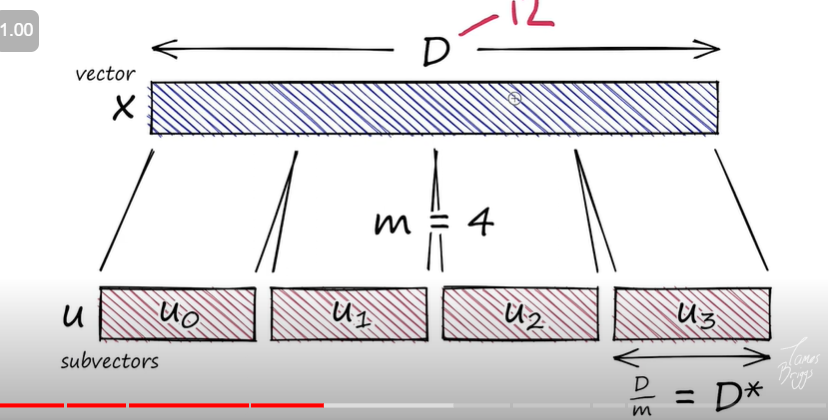

In [40]:
# No Of Centroids 
# NB:The number of created centroids k is usually chosen as a power of 2 for more efficient memory usage. 
k=2**5 # for ex as the more centroids ==> more accurate but of course slower later

assert k%m==0 # The No of centroids must be divisible by the no of Sub_vectors so that each vector has the same no of centroids

k_=int(k/m) # no of centroids per each sub_vector

print(f"# of Centroids per each sub_vector: {k_}\n")

# of Centroids per each sub_vector: 8



+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| [9, 6, 0] | [5, 5, 3] | [6, 6, 8] | [2, 5, 1] | [2, 8, 7] | [2, 1, 0] | [5, 7, 0] | [4, 2, 2] |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| [6, 3, 5] | [1, 5, 8] | [4, 3, 2] | [3, 0, 0] | [5, 3, 1] | [8, 1, 3] | [8, 4, 3] | [0, 7, 6] |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| [2, 1, 7] | [3, 6, 4] | [4, 8, 2] | [1, 7, 8] | [7, 0, 7] | [3, 7, 3] | [6, 7, 6] | [3, 2, 9] |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| [0, 1, 9] | [2, 1, 7] | [4, 2, 8] | [7, 1, 8] | [2, 6, 5] | [6, 6, 8] | [3, 0, 9] | [4, 0, 5] |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+


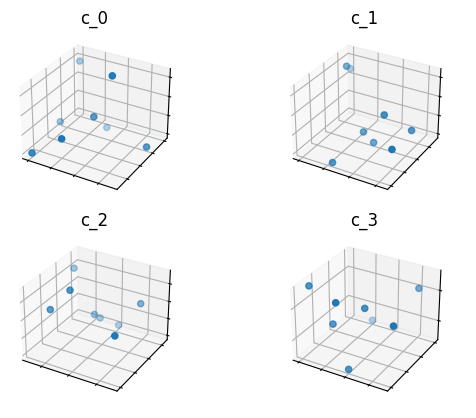

In [41]:
# Generating Centroids of count = k and size the same as the sub vector size =D_
# Approach(1) Random [Just for Understating but the idea is wrong]
from random import randint
c=[]
for j in range(m):
    # each sub_vector
    c_j=[]
    for i in range(k_):
        #1 centroid in the sub_vector j
        c_ji=[randint(0,9) for _ in range(D_)]  # Vector of size D_ [size of sub_vector] of random numbers
        c_j.append(c_ji)
    c.append(c_j)
print_list(c)
visualize_centroids(m,c,k_)
# c #uncomment to see the shape of c


# Approach(2) Kmeans Estimators for each sub_vector so we need training

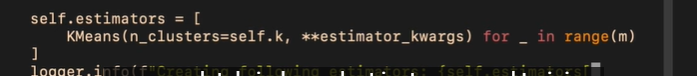

In [44]:
#   Mapping sub_vector to its nearest centroid
def euclidean(v,u):
    distance=sum((x-y)**2 for x,y in zip(v,u))
    return distance
def nearest(c_j,u_j):
    '''
    Get nearest center to teh sub_vector u_j from teh list c_j 
    '''
    distance=9e9
    for i in range(k_):
        new_dist=euclidean(c_j[i],u_j)
        if new_dist<distance:
            nearest_idx=i   # Reproduction Value IDs Step
            distance=new_dist 
    return nearest_idx  


ids=[]
for j in range(m):
    # for each sub_vector
    i=nearest(c[j],u[j])
    ids.append(i)
print("ids (with respect to each sub vector):",ids)

# Ex ids (with respect to each sub vector): [3, 5, 6, 4]   the sub_vector(1) nearest centroid in the 3rd in the centroids of sub_vector 1
# the sub_vector(2) nearest centroid in the 5th in the centroids of sub_vector 2


ids (with respect to each sub vector): [3, 5, 6, 4]


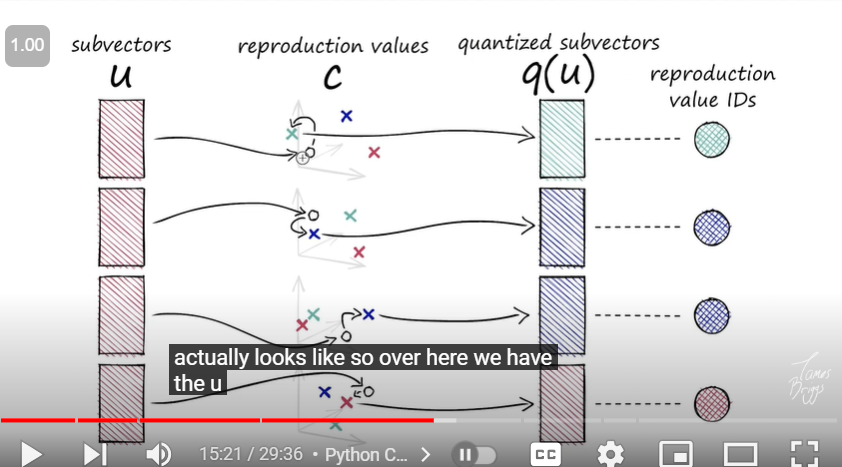

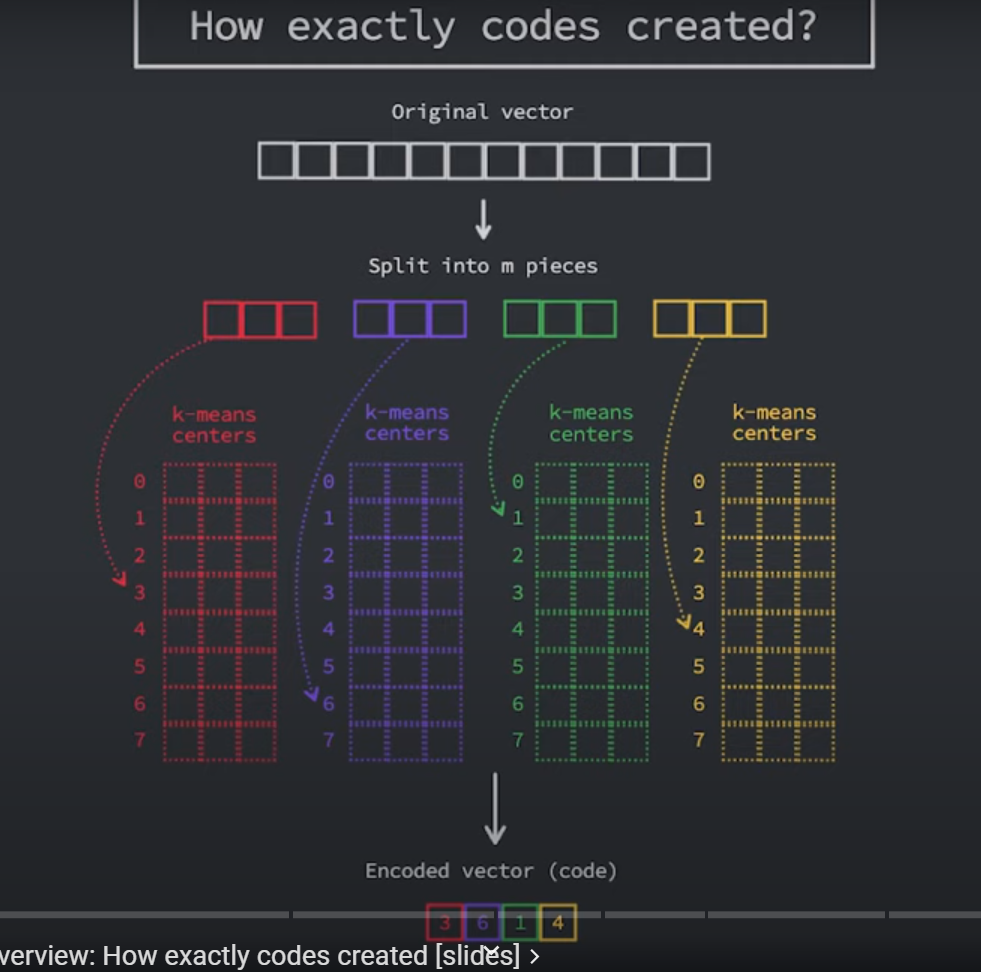

In [48]:
# Reproduction Step construct the centroid form its ID
q=[]
for j in range(m):
    c_ji=c[j][ids[j]]
    q.extend(c_ji)
print("q:(The nearest centroid vector to query vector x)[Quantized Vector]",q)


# Error between this approximation and the true x vector
def mse(v,u):
    error=sum((x-y)**2 for x,y in zip(u,v))
    return error
print("mse(Mean Square Error):",mse(x,q))

q:(The nearest centroid vector to query vector x)[Quantized Vector] [2, 5, 1, 8, 1, 3, 6, 7, 6, 2, 6, 5]
mse(Mean Square Error): 48


In [ ]:
# To Get the top near K vectors to x [Search Step] ###########
 
# q(u) is one of all the vectors we already have Data Base so we loop and take the nearest ones 
# although it is brute force but instead we are measuring distance between 

# 1. Get Code word representing the query 
# 2. Get distance between each code in the DB
# 3. Pick the nearest ones

# NB we store only the CodeWords in The DB not the original one and when getting nearest k are nearest k code words not the original one but in our case i think we need original ones so just store reference to them next to teh code words being :D 

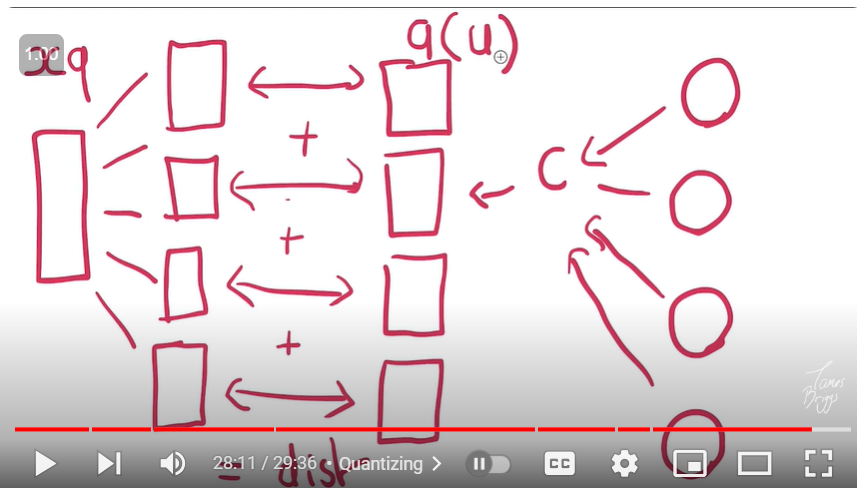

Use data compression techniques which might lead to memory issues
product quantization is a lossy-compression method which results in lower prediction accuracy but in practice, this algorithm works very well.(More Centroids More accurate  later understood)

1. The Brute Force Approach (the Best) comparing query vector to every one in the DB
    problem we can solve dec search size instead of exhaustive search on large dimension combine dimensions to less one for ex 10 instead of  200000

2. Split & Convert to Code Words both Query & The DB  then Exhaustive Search [Lower Dimensionality]
3. How to get CodeWord ?? Split to sub vector
    for each sub_vector has k_centroids get index of the nearest centroid
    Code Done :D
4. How to get the Centroids of Each SubVector ?  Training <3
    Have Training Set from The original DB split into sub_vectors and apply k means on every sub_vector independently --> we have D_(no of sub_vectors) k means models

Search:
1. Convert Query to code word
2. Get distance between Query and every code word in the data base
3. Take nearest k [Note problem of losing original vector idea store reference] 


refer to line 2 again

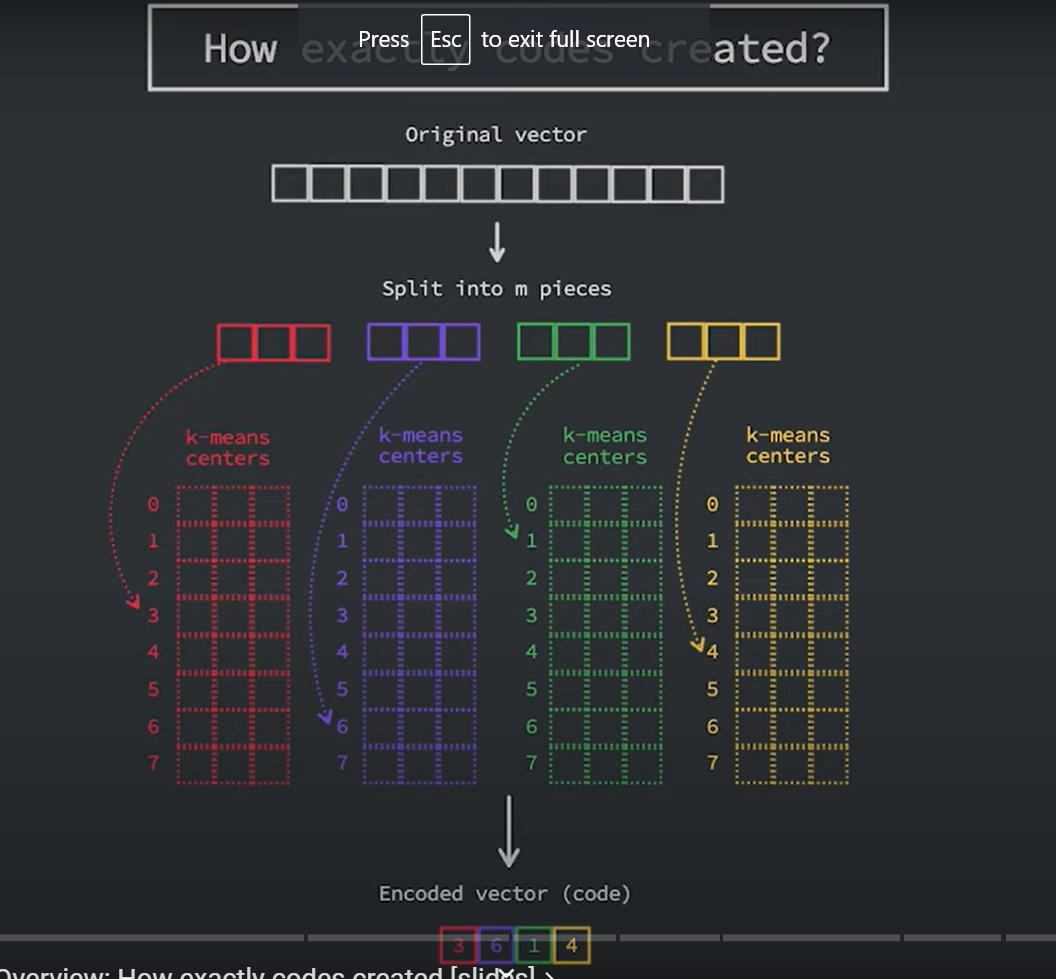